# Initialize

In [6]:
# Options

## Debugging level
debug_level = 0


In [7]:
# Initialize framework
constants, tools = init_processing(debug_level)
%matplotlib inline


In [8]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [9]:
historical_data = atlas.reset_index().set_index("Service Start").sort_index(ascending=True)

historical_data_invoice_amount = historical_data.groupby("Service Start").sum()["Invoice Amount"]
historical_data_invoice_count = historical_data.groupby("Service Start").count()["Invoice Amount"]

# Critical
historical_data_invoice_amount_cumulative = historical_data_invoice_amount.cumsum()
historical_data_invoice_count_cumulative = historical_data_invoice_count.cumsum()

# Extra
historical_data_invoice_mean = historical_data.groupby("Service Start").mean()["Invoice Amount"]
historical_data_nbr_users = historical_data.groupby("Service Start").sum()["Number of Users"]
historical_data_nbr_customers = historical_data.groupby("Service Start").count()["Customers"]

historical_data_nbr_users_cumulative = historical_data_nbr_users.cumsum()
historical_data_nbr_customers_cumulative = historical_data_nbr_customers.cumsum()


In [10]:
historical_data_invoice_amount_cumulative.tail(20)

Service Start
2020-09-24 00:00:00-04:00    2099373.23
2020-09-28 00:00:00-04:00    2106623.23
2020-09-30 00:00:00-04:00    2116198.23
2020-10-01 00:00:00-04:00    2202553.23
2020-10-02 00:00:00-04:00    2206903.23
2020-10-06 00:00:00-04:00    2211403.23
2020-10-07 00:00:00-04:00    2216673.23
2020-10-09 00:00:00-04:00    2221373.23
2020-10-14 00:00:00-04:00    2223013.23
2020-10-15 00:00:00-04:00    2224913.23
2020-10-19 00:00:00-04:00    2226613.23
2020-10-20 00:00:00-04:00    2231413.23
2020-10-22 00:00:00-04:00    2231975.23
2020-10-23 00:00:00-04:00    2232515.23
2020-10-31 00:00:00-04:00    2258765.23
2020-11-01 00:00:00-04:00    2261190.23
2020-11-02 00:00:00-05:00    2272690.23
2020-11-03 00:00:00-05:00    2274690.23
2020-11-07 00:00:00-05:00    2278056.23
2020-12-31 00:00:00-05:00    2280306.23
Name: Invoice Amount, dtype: float64

In [11]:
mc = MCSimulation_Generic(
    value_title="Invoice Amount",
    value_list = historical_data_invoice_amount_cumulative,
    num_simulation=1000,
    num_trailing_points = 10,
    scale_results=True,
    allow_negative_returns = True
)

mc.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1     1.138889   1.138889   1.138889   1.138889   1.138889   1.138889   
2     1.187500   1.187500   1.187500   1.187500   1.187500   1.187500   
3     1.801389   1.801389   1.801389   1.801389   1.801389   1.801389   
4     1.848611   1.848611   1.848611   1.848611   1.848611   1.848611   
..         ...        ...        ...        ...        ...        ...   
272  33.223847  32.965805  34.972509  39.339214  30.205808  34.793852   
273  34.383553  30.000127  31.907717  39.113915  28.738257  36.198338   
274  36.136291  29.572069  32.319447  39.626323  28.241258  37.624752   
275  36.574785  30.177892  30.894275  41.294689  29.238225  39.009977   
276  36.207415  30.614336  30.907445  39.226676  29.842244  40.115626   

           6          7          8          9    ...        990        991  \
0     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1     1.138889   1.138889   1.138889   1.138889  ...   1.138889   1.138889   
2     1.187500   1.187500   1.187500   1.187500  ...   1.187500   1.187500   
3     1.801389   1.801389   1.801389   1.801389  ...   1.801389   1.801389   
4     1.848611   1.848611   1.848611   1.848611  ...   1.848611   1.848611   
..         ...        ...        ...        ...  ...        ...        ...   
272  32.467143  42.791197  32.782435  43.256833  ...  28.123504  32.725211   
273  33.090715  47.029542  32.607804  42.376972  ...  28.380687  32.703877   
274  35.990168  47.675441  34.494329  41.979625  ...  29.187581  30.322086   
275  38.028318  48.099994  37.109822  42.655874  ...  28.498399  30.655649   
276  38.291245  47.418785  35.270323  41.688563  ...  29.338844  32.154039   

           992        993        994        995        996        997  \
0     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1     1.138889   1.138889   1.138889   1.138889   1.138889   1.138889   
2     1.187500   1.187500   1.187500   1.187500   1.187500   1.187500   
3     1.801389   1.801389   1.801389   1.801389   1.801389   1.801389   
4     1.848611   1.848611   1.848611   1.848611   1.848611   1.848611   
..         ...        ...        ...        ...        ...        ...   
272  35.713523  35.383667  33.478548  29.872034  33.058630  32.474440   
273  34.723776  34.824065  34.111095  32.082352  32.597061  31.027189   
274  36.415511  33.489777  32.924063  32.885995  30.651846  32.153489   
275  36.955203  35.078392  34.682476  31.261160  30.164769  33.620995   
276  35.884090  34.098447  34.726941  30.774590  29.979200  34.223527   

           998        999  
0     1.000000   1.000000  
1     1.138889   1.138889  
2     1.187500   1.187500  
3     1.801389   1.801389  
4     1.848611   1.848611  
..         ...        ...  
272  29.510282  28.789062  
273  31.082149  27.677053  
274  32.118999  28.809141  
275  31.016668  27.316876  
276  32.536226  26.401174  

[277 rows x 1000 columns]

In [12]:
mc.plot_simulation()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:ylabel='Frequency'>

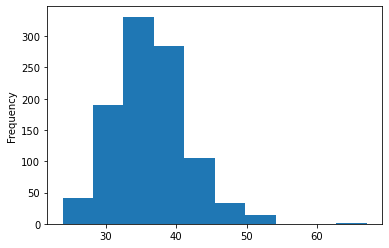

In [13]:
# mc.plot_distribution()
mc.simulated_return.iloc[-1, :]
mc.simulated_return.iloc[-1, :].plot(kind='hist', title="")
# mc.simulated_return.iloc[-1, :].plot(kind='hist', bins=10, density=True, title="", height=500, width=800)


In [14]:
mc.summarize_cumulative_return()

count           1.000000e+03
mean            2.610886e+06
std             3.703445e+05
min             1.716030e+06
25%             2.351783e+06
50%             2.583851e+06
75%             2.827313e+06
max             4.831520e+06
95% CI Lower    2.725632e+01
95% CI Upper    4.718492e+01
Name: 276, dtype: float64

In [15]:
historical_data_invoice_amount_cumulative.hvplot.line()

:Curve   [Service Start]   (Invoice Amount)

In [16]:
historical_data_invoice_count_cumulative.hvplot.line()

:Curve   [Service Start]   (Invoice Amount)

In [17]:
historical_data_nbr_users_cumulative.hvplot.line()

:Curve   [Service Start]   (Number of Users)

In [18]:
historical_data_nbr_customers_cumulative.hvplot.line()

:Curve   [Service Start]   (Customers)